In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import matplotlib.dates as mdates

In [10]:
def reader(path, first_var):
    # Open the file and read the lines
    skip=1
    with open(path, "r") as file:
        # Iterate over the lines
        for line in file:
            # Strip leading and trailing whitespace
            line = line.strip()
            # Check if the line contains column names
            if line.startswith(first_var):
                # Split the line by whitespace and append to the columns list
                columns = line[1:].strip().split("\t")
                break  # Stop reading lines after finding column names
            skip+=1
    # Read the data into a DataFrame, skipping the first 6 rows of comments
    d = pd.read_csv(path, sep='\t', skiprows=skip, names=columns)
    if 'DOY.Frac' in d.keys():
        d['dt'] = pd.to_datetime('2024-1-1') + pd.to_timedelta(d['DOY.Frac'], unit='D') - pd.Timedelta(days=1)
    if 'StartTimeSt' in d.keys():
        d['st_dt'] = pd.to_datetime('2024-1-1') + pd.to_timedelta(d['StartTimeSt'], unit='D') - pd.Timedelta(days=1)
    if 'EndTimeSt' in d.keys():
        d['end_dt'] = pd.to_datetime('2024-1-1') + pd.to_timedelta(d['EndTimeSt'], unit='D') - pd.Timedelta(days=1)
    return d

In [11]:
d = reader('./data/DASH_FLOW_240404_090206.dat', "#DOY.Frac")

In [12]:
d.keys()

Index(['DOY.Frac', 'YYYY', 'Secs', 'DO_Sh', 'DO_Smp', 'DO_Press', 'DO_Ht_T',
       'DO_Ht_Pwr', 'DO_Fl_T', 'DO_X_T', 'HO_Sh_D_Fl', 'HO_Sh', 'HO_Smp',
       'HO_Press', 'HO_RH', 'HO_T', 'HO_Ht_T', 'HO_Ht_Pwr', 'HO_Fl_T',
       'HO_X_T', 'HO_DP_Cl', 'HO_DP_Lk', 'HM_Sh_D_Fl', 'HM_Sh', 'HM_Xs',
       'HM_Smp_Xs', 'HM_Press', 'HM_RH', 'HM_T', 'HM_Ht_T', 'HM_Ht_Pwr',
       'HM_Fl_T', 'HM_X_T', 'HM_DP_Cl', 'HM_DP_Lk', 'H2O_T', 'H2O_Pwr',
       'H2O_Lvl', 'H2O_Cnt', 'dt'],
      dtype='object')

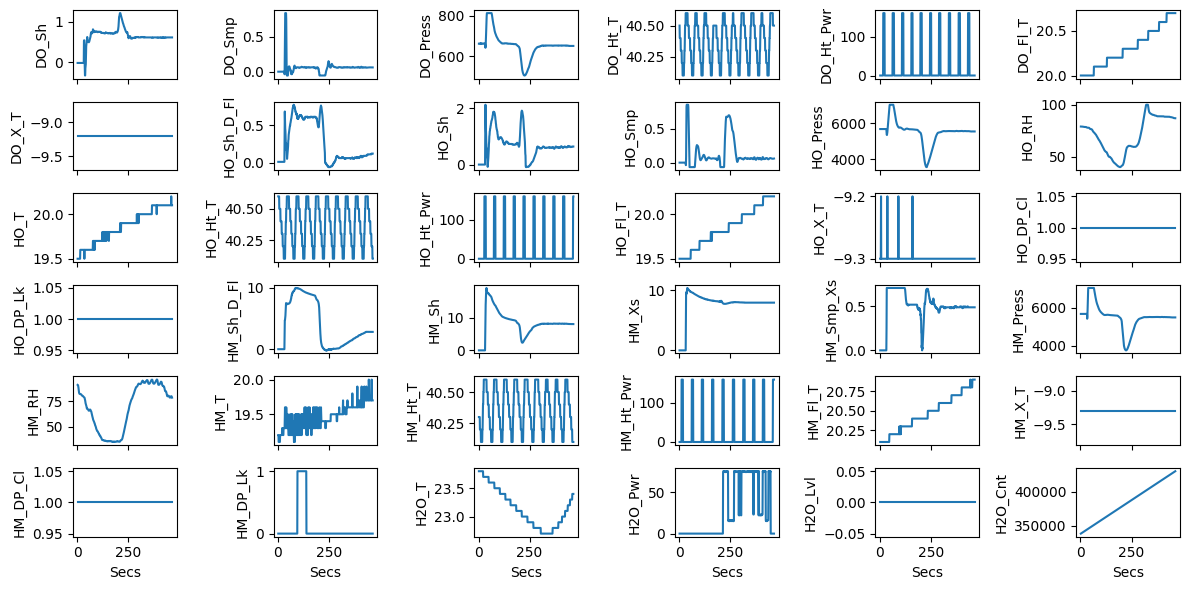

In [13]:
fig,axes = plt.subplots(6,6, sharex=True, figsize=(12, 6))
ks = d.keys()
for i,ax in enumerate(axes.ravel()):
    k = ks[i+3]
    ax.plot(d['Secs'], d[k])
    ax.set_ylabel(k)
    if i>29:
        ax.set_xlabel('Secs')
fig.tight_layout()
plt.savefig('./figures/all.png', dpi=300)

In [15]:
d = reader('./data/OPC_212_240404_083940.txt', "#YY/MM/DD")

In [16]:
for i in range(0,len(d)):
    num = []
    for i, k in enumerate(d.keys()):
        if 'bin' in k:
            print(i)
            num.append(d.iloc[100][k])
    break
    plt.plot(num)

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


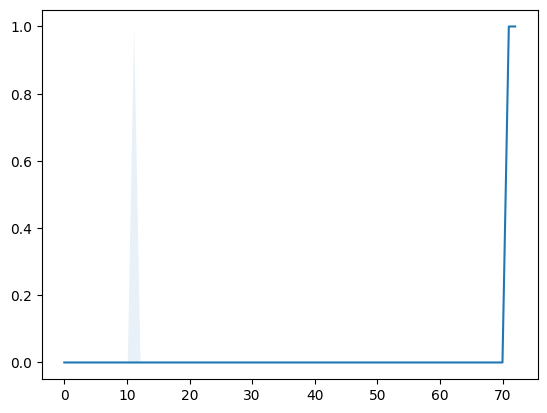

In [17]:
bd = d.groupby(d.index // 5000).median(numeric_only=True)
bd_25 = d.groupby(d.index // 5000).quantile(.25, numeric_only=True)
bd_75 = d.groupby(d.index // 5000).quantile(.75, numeric_only=True)
for i in range(0,len(bd)):
    x = np.linspace(0,72,72)
    y = bd.iloc[i,15:87]
    plt.plot(x, y)
    plt.fill_between(x, bd_25.iloc[i,15:87], bd_75.iloc[i,15:87], alpha=.1)

In [18]:
paths = sorted(glob.glob('./data/*SEMS*'))

In [19]:
all_d = []
for i in range(0, len(paths)):
    all_d.append(reader(paths[i], "#DOY.Frac"))
all_d = pd.concat(all_d).reset_index()

/var/folders/gq/g7n3vynx41752gfhs4r0wx780000gn/T/ipykernel_8537/2392081714.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_d = pd.concat(all_d).reset_index()


In [20]:
keys = ['UpSt_Sh', 'UpSt_Xs', 'UpSt_Samp', 'UpSt_FAdj', 'UpSt_Rh', 'UpSt_T', 'UpSt_Press', 'UpSt_Dia', 'UpSt_HV']

In [21]:
all_d

,index,DOY.Frac,YYYY,Secs,UpSt_Sh,UpSt_Xs,UpSt_Samp,UpSt_FAdj,UpSt_Rh,UpSt_T,UpSt_Press,UpSt_Dia,UpSt_HV,dt
0,0,95.358306,2024,1.9,0.00,0.00,0.00,1.0,0.0,0.0,0.0,225.0,0,2024-04-04 08:35:57.603840000
1,1,95.358317,2024,2.9,0.02,-0.54,-0.01,1.0,43.1,16.0,996.0,225.0,778,2024-04-04 08:35:58.597440000
2,2,95.358329,2024,3.9,0.02,-0.54,-0.01,1.0,43.1,16.0,996.0,225.0,778,2024-04-04 08:35:59.599680000
3,3,95.358340,2024,4.9,0.02,-0.55,-0.01,1.0,43.1,16.0,996.0,225.0,778,2024-04-04 08:36:00.601920000
4,4,95.358352,2024,5.9,0.01,-0.53,-0.01,1.0,43.1,16.0,996.0,225.0,778,2024-04-04 08:36:01.604160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,322,95.402884,2024,323.0,4.71,1.67,-0.95,1.0,29.9,21.5,1040.0,200.0,653,2024-04-04 09:40:09.203519999
3825,323,95.402896,2024,324.0,4.80,2.30,-0.95,1.0,30.2,21.6,1049.0,200.0,673,2024-04-04 09:40:10.197120000
3826,324,95.402907,2024,325.0,4.72,2.58,-0.95,1.0,30.4,21.6,1050.0,200.0,673,2024-04-04 09:40:11.199360000
3827,325,95.402919,2024,326.0,4.62,3.05,-0.95,1.0,30.6,21.6,1047.0,200.0,673,2024-04-04 09:40:12.201600000


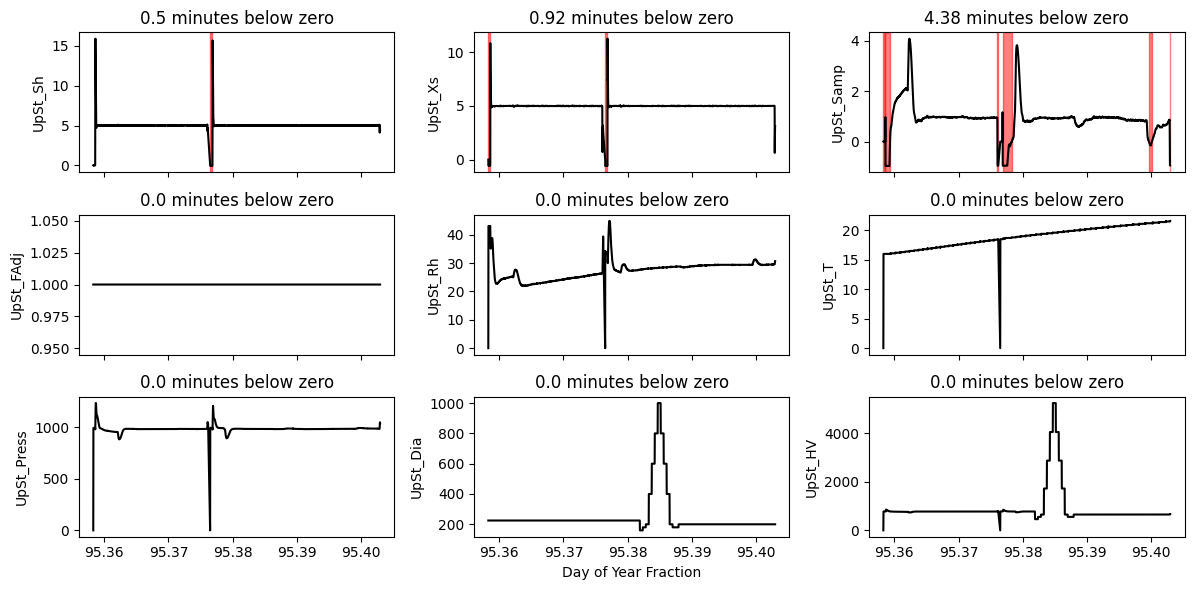

In [22]:
fig,axes = plt.subplots(3,3, sharex=True, figsize=(12, 6))
ks = keys
for i,ax in enumerate(axes.ravel()):
    k = ks[i]
    ax.plot(all_d['DOY.Frac'], all_d[k], c='black')

    below_zero = all_d[all_d[k] < 0]

    start_points = below_zero.index[~(below_zero.index.to_series().diff() == 1)]
    end_points = below_zero.index[~(below_zero.index.to_series().diff(-1) == -1)]

    # Calculate the duration of each block where the values are below zero
    durations = all_d.loc[end_points, 'DOY.Frac'].values - all_d.loc[start_points, 'DOY.Frac'].values

    # Calculate the total time below zero
    total_time_below_zero = durations.sum()
    #ax.text(.1, .9, str(round(total_time_below_zero*24*60,2)) + ' minutes below zero', transform=ax.transAxes)
    ax.set_title(str(round(total_time_below_zero*24*60,2)) + ' minutes below zero')

    for j in range(0, len(start_points)):
        ax.axvspan(all_d['DOY.Frac'].loc[start_points[j]], all_d['DOY.Frac'].loc[end_points[j]], color='red', alpha=0.5)

    '''
    start = []
    stop = []
    for j in range(0, len(all_d)):
        dr = all_d.iloc[j] # retrieves single data row
        if j+1<len(all_d):
            dr2 = all_d.iloc[j+1] # retrieves single data subsequent row
        else:
            if len(start) > len(stop):
                stop.append(dr['DOY.Frac'])
                break
        if dr[k]<0:
            if dr2[k] < 0:
                start.append(dr['DOY.Frac'])
            else:
                stop.append(dr['DOY.Frac']+.000001)
        if dr[k]>0 and len(start) > len(stop):
            stop.append(dr['DOY.Frac'])
    for j in range(0, len(start)):
        print(j)
        ax.axvspan(start[j], stop[j], color='red', alpha=0.5)
    bz = all_d[all_d[k]<0]
    ax.scatter(bz['DOY.Frac'], bz[k])
    '''
    
    ax.set_ylabel(k)
    if i==7:
        ax.set_xlabel('Day of Year Fraction')
fig.tight_layout()
fig.savefig('./figures/all2.png', dpi=300)

In [23]:
'HO_RH' 'HM_RH' 'UpSt_Samp'

'HO_RHHM_RHUpSt_Samp'

In [24]:
paths = sorted(glob.glob('./data/DASH_FLOW*'))
all_d2 = []
for i in range(0, len(paths)):
    all_d2.append(reader(paths[i], "#DOY.Frac"))
all_d2 = pd.concat(all_d2).reset_index()
keys = ['UpSt_Sh', 'UpSt_Xs', 'UpSt_Samp', 'UpSt_FAdj', 'UpSt_Rh', 'UpSt_T', 'UpSt_Press', 'UpSt_Dia', 'UpSt_HV']

/var/folders/gq/g7n3vynx41752gfhs4r0wx780000gn/T/ipykernel_8537/475115413.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_d2 = pd.concat(all_d2).reset_index()


In [25]:
paths = sorted(glob.glob('./data/*SAMP_PARAM*'))
all_d3 = []
for i in range(0, len(paths)):
    all_d3.append(reader(paths[i], "#StartTimeSt"))
all_d3 = pd.concat(all_d3).reset_index()

/var/folders/gq/g7n3vynx41752gfhs4r0wx780000gn/T/ipykernel_8537/1622403170.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_d3 = pd.concat(all_d3).reset_index()


In [26]:
all_d3.keys()

Index(['index', 'StartTimeSt', 'EndTimeSt', 'StartYr', 'EndYr', 'StartSecs',
       'EndSecs', 'Samp_Num', 'DO_Tot_Cnts', 'HO_Tot_Cnts', 'DO_Mode_Val',
       'HO_Mode_Val', 'UpSt_Dia', 'UpSt_Sh_Targ', 'RH_Targ', 'HO_Rh_Av',
       'HO_Rh_Sdev', 'HM_RH_Av', 'HM_Rh_Sdev', 'DO_Sh_Targ', 'DO_Sh_Av',
       'DO_Sh_Sdev', 'DO_Samp_Targ', 'DO_Samp_Av', 'DO_Samp_Sdev',
       'HO_Sh_Targ', 'HO_Sh_Av', 'HO_Sh_Sdev', 'HO_Samp_Targ', 'HO_Samp_Av',
       'HO_Samp_Sdev', 'HM_Sh_Targ', 'HM_Sh_Av', 'HM_Sh_Sdev', 'HM_Xs_Targ',
       'HM_Xs_Av', 'HM_Xs_Sdev', 'Samp_Xs_Targ', 'Samp_Xs_Av', 'Samp_Xs_Sdev',
       'st_dt', 'end_dt'],
      dtype='object')

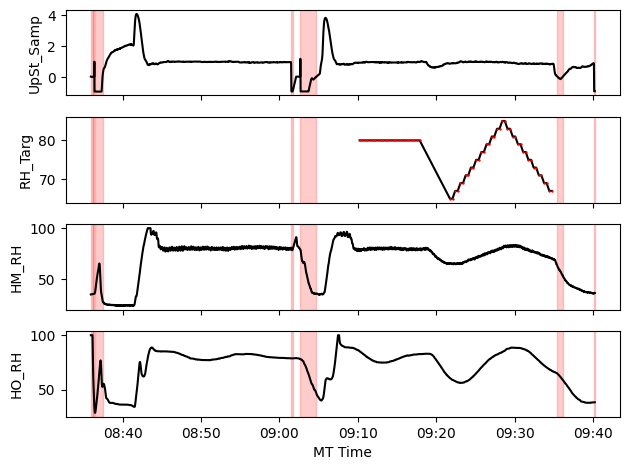

In [27]:
fig, axes = plt.subplots(4, sharex=True)

axes[0].plot(all_d['dt'], all_d['UpSt_Samp'], c='black')
axes[0].set_ylabel('UpSt_Samp')
below_zero = all_d[all_d['UpSt_Samp'] < 0]
start_points = below_zero.index[~(below_zero.index.to_series().diff() == 1)]
end_points = below_zero.index[~(below_zero.index.to_series().diff(-1) == -1)]
for i in range(0,4):
        for j in range(0, len(start_points)):
                axes[i].axvspan(all_d['dt'].loc[start_points[j]], all_d['dt'].loc[end_points[j]], color='red', alpha=0.2)

x,y = [],[]
for i in range(0, len(all_d3)):
        row = all_d3.iloc[i]
        x.extend([row['st_dt'], row['end_dt']])
        y.extend([row['RH_Targ'], row['RH_Targ']])

#axes[1].plot(x,y, c='black')
axes[1].plot(x,y, c='black')
axes[1].scatter(x,y, c='r', s=.5, zorder=100)
axes[1].set_ylabel('RH_Targ')
axes[2].plot(all_d2['dt'], all_d2['HM_RH'], c='black')
axes[2].set_ylabel('HM_RH')
axes[3].plot(all_d2['dt'], all_d2['HO_RH'], c='black')
axes[3].set_ylabel('HO_RH')
axes[3].set_xlabel('MT Time')
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
fig.savefig('./figures/neg_flow.png', dpi=300, bbox_inches='tight')